In [1]:
import numpy as np

In [2]:
%run magic.ipynb

## Supervised learning for classification
給一堆 $x$, 和他的分類，我們找出計算 x 的分類的方式

### One hot encoding
如果我們有三類種類別， 我們可以來編碼這三個類別
* $(1,0,0)$
* $(0,1,0)$
* $(0,0,1)$

### 問題
* 為什麼不直接用 1,2,3 這樣的編碼呢？


### Softmax Regression 的模型是這樣的
我們的輸入 $x=\begin{pmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{pmatrix} $ 是一個向量，我們看成 column vector 好了

而 Weight: $W = \begin{pmatrix} W_0 \\ W_1 \\ W_2 \end{pmatrix} =  
\begin{pmatrix} W_{0,0} & W_{0,1} &  W_{0,2} & W_{0,3}\\ 
 W_{1,0} & W_{1,1} &  W_{1,2} & W_{1,3} \\ 
 W_{2,0} & W_{2,1} &  W_{2,2} & W_{2,3} \end{pmatrix} $
 
 Bias: $b=\begin{pmatrix} b_0 \\ b_1 \\ b_2 \end{pmatrix} $ 


我們先計算"線性輸出"  $ c = \begin{pmatrix} c_0 \\ c_1 \\ c_2 \end{pmatrix} =  Wx+b =
\begin{pmatrix} W_0 x + b_0 \\ W_1 x + b_1 \\ W_2 x + b_2 \end{pmatrix}   $， 然後再取 $exp$ (逐項取)。 最後得到一個向量。
 
 $d = \begin{pmatrix} d_0 \\ d_1 \\ d_2 \end{pmatrix} = e^{W x + b} = \begin{pmatrix} e^{c_0} \\ e^{c_1} \\ e^{c_2} \end{pmatrix}$


將這些數值除以他們的總和。
我們希望出來的數字會符合這張圖片是這個數字的條件機率。

###  $q(i) = Predict_{W,b}(Y=i|x)  = \frac {e^{W_i x + b_i}} {\sum_j e^{W_j x + b_j}} = \frac {d_i} {\sum_j d_j}$

### 問題
* 為什麼要用 $exp$?


先隨便算一個 $\mathbb{R}^2 \rightarrow \mathbb{R}^3$ 的網路

In [3]:
# Weight
W = Matrix([1,2],[3,4], [5,6])
W

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.]])

In [4]:
# Bias
b = Vector(1,0,-1)
b

array([[ 1.],
       [ 0.],
       [-1.]])

In [5]:
# 輸入
x = Vector(2,-1)
x

array([[ 2.],
       [-1.]])

### 任務：計算最後的猜測機率 $q$
Hint: `np.exp` 可以算 $exp$

In [ ]:
# 參考答案
# Wx+b
c = W @ x + b

# d = exp(Wx+b)
d = np.exp(c)

# q = d/sum(d)
q = d/d.sum()


### 練習
設計一個網路:
* 輸入是二進位 0 ~ 15
* 輸出依照對於 4 的餘數分成四類

Hint: 可以參考上面 W, b 的設定方式

In [9]:
# Hint 下面產生數字 i 的 2 進位向量
i = 13
x = Vector(i%2, (i>>1)%2, (i>>2)%2, (i>>3)%2)
x

array([[ 1.],
       [ 0.],
       [ 1.],
       [ 1.]])

In [ ]:
# 參考答案
W = Matrix([-1,-1,0,0], [1,-1,0,0], [-1,1,0,0], [1,1,0,0])
b = Vector(0,0,0,0)
for i in range(16):
    x = Vector(i%2, (i>>1)%2, (i>>2)%2, (i>>3)%2)
    r = W @ x + b
    print("i=", i, "predict:", r.argmax(), "ground truth:", i%4)


### 練習
設計一個網路:
* 輸入是二進位 0 ~ 15
* 輸出依照對於 3 的餘數分成三類

Hint: 不用全部正確，用猜的，但正確率要比亂猜高。可以利用統計的結果猜猜看。

In [ ]:
# 參考答案
W = Matrix([0,0,0,0], [1,-1,1,-1], [-1,1,-1,1])
b = Vector(0.1,0,0)
for i in range(16):
    x = Vector(i%2, (i>>1)%2, (i>>2)%2, (i>>3)%2)
    r = W @ x + b
    print("i=", i, "predict:", r.argmax(), "ground truth:", i%3)

## Gradient descent

### 誤差函數
為了要評斷我們的預測的品質，要設計一個評斷誤差的方式

假設輸入值 $x$ 對應到的真實類別是 $y$, 那我們定義誤差函數

## $ loss = -\log(q(y))=- \log(Predict(Y=y|x, W,b)) $


其實比較一般但比較複雜一點的寫法是

## $ loss = - \sum_i p(i)\log(q(i))  $

其中 $i$ 是所有類別， 而 $ p(i) = \Pr(Y=i|x) $ 是真實發生的機率

但我們目前 $x$ 對應到的真實類別是 $y$， 所以直接 $p(y)=1$


### 想辦法改進。 
我們用一種被稱作是 gradient descent 的方式來改善我們的誤差。

因為我們知道 gradient 是讓函數上升最快的方向。所以我們如果朝 gradient 的反方向走一點點（也就是下降最快的方向），那麼得到的函數值應該會小一點。

記得我們的變數是 $W$ 和 $b$ (裡面有一堆 W_i,j b_i 這些變數)，所以我們要把 $loss$ 對 $W$ 和 $b$ 裡面的每一個參數來偏微分。

還好這個偏微分是可以用手算出他的形式，而最後偏微分的式子也不會很複雜。

$loss$ 展開後可以寫成
## $loss = -\log(q(y)) = \log(\sum_j d_j) - d_i \\
 = \log(\sum_j e^{W_j x + b_j}) - W_i x - b_i$

注意 $d_j = e^{W_j x + b_j}$ 只有變數 $b_j, W_j$ 

 對 $k \neq i$ 時, $loss$ 對 $b_k$ 的偏微分是 
 $$ \frac{e^{W_k x + b_k}}{\sum_j e^{W_j x + b_j}} = q(k)$$
對 $k = i$ 時, $loss$ 對 $b_k$ 的偏微分是 
$$ q(k) - 1$$



對 $W$ 的偏微分也不難

 對 $k \neq i$ 時, $loss$ 對 $W_{k,t}$ 的偏微分是 
 $$ \frac{e^{W_k x + b_k} W_{k,t} x_t}{\sum_j e^{W_j x + b_j}} = q(k) x_t$$
對 $k = i$ 時, $loss$ 對 $W_{k,t}$ 的偏微分是 
$$ q(k) x_t - x_t$$



### 實做部份

In [14]:
# 先產生隨機的 W 和 b
W = Matrix(np.random.normal(size=(3,4)))
b = Vector(np.random.normal(size=(3,)))

In [15]:
W

array([[-0.71007037,  0.90924923, -0.18450098, -0.452941  ],
       [ 0.45422787,  0.51598233, -1.10175927, -0.02488268],
       [ 0.12595801,  0.49698172, -0.53335558,  0.92919945]])

In [16]:
b

array([[ 0.42784862],
       [ 0.91115569],
       [-0.33484191]])

### 問題
W, b 的 size 為什麼要這樣設定？

### 任務： 隨便設定一組 x, y, 我們來跑跑看 gradient descent

In [17]:
i = 14
x = Vector(i%2, (i>>1)%2, (i>>2)%2, (i>>3)%2)
y = i%3

### 步驟：計算 q

In [ ]:
# 參考答案
# Wx+b
c = W @ x + b

# d = exp(Wx+b)
d = np.exp(c)

# q = d/sum(d)
q = d/d.sum()


### 步驟： 計算 loss

In [ ]:
# 參考答案
loss = -np.log(q[y])
loss

### 步驟：計算對 b 的 gradient

In [23]:
#參考答案
%run -i  softmax_compute_grad_b.py
grad_b

array([[ 0.39388855],
       [ 0.26425332],
       [-0.65814187]])

### 步驟：計算對 W 的 gradient

In [ ]:
# 參考答案
grad_W =   q @ x.T
grad_W[y] -= x.ravel()

# or 
grad_W = grad_b @ x.T

grad_W

### 步驟：更新 W, b  各減掉 0.5 * gradient， 然後看看新的 loss 是否有進步了？

In [27]:
# 參考答案
%run -i softmax_update_Wb.py

In [28]:
# 原先的 q
q

array([[ 0.39388855],
       [ 0.26425332],
       [ 0.34185813]])

In [29]:
# 原先的 loss
loss

array([ 1.07335947])

In [30]:
# 現在的 loss
%run -i softmax_compute_q.py
%run -i softmax_compute_loss1.py
loss

array([ 0.2332524])

In [31]:
q

array([[ 0.1112872 ],
       [ 0.09675915],
       [ 0.79195366]])

### 一次訓練多組資料
上面只針對一組 x (i=14) 來訓練，如果一次對所有 x 訓練呢？

通常我們會把組別放在 axis-0

In [32]:
X = np.array([Vector(i%2, (i>>1)%2, (i>>2)%2, (i>>3)%2) for i in range(16)])
for i in range(4):
    print("i=", i)
    display(X[i])

i= 0


array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

i= 1


array([[ 1.],
       [ 0.],
       [ 0.],
       [ 0.]])

i= 2


array([[ 0.],
       [ 1.],
       [ 0.],
       [ 0.]])

i= 3


array([[ 1.],
       [ 1.],
       [ 0.],
       [ 0.]])

In [33]:
X

array([[[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 1.],
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 1.],
        [ 0.],
        [ 0.]],

       [[ 1.],
        [ 1.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 1.],
        [ 0.]],

       [[ 1.],
        [ 0.],
        [ 1.],
        [ 0.]],

       [[ 0.],
        [ 1.],
        [ 1.],
        [ 0.]],

       [[ 1.],
        [ 1.],
        [ 1.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        [ 1.]],

       [[ 1.],
        [ 0.],
        [ 0.],
        [ 1.]],

       [[ 0.],
        [ 1.],
        [ 0.],
        [ 1.]],

       [[ 1.],
        [ 1.],
        [ 0.],
        [ 1.]],

       [[ 0.],
        [ 0.],
        [ 1.],
        [ 1.]],

       [[ 1.],
        [ 0.],
        [ 1.],
        [ 1.]],

       [[ 0.],
        [ 1.],
        [ 1.],
        [ 1.]],

       [[ 1.],
        [ 1.],
        [ 1.],
        [ 1.]]])

In [34]:
# 對應的組別 
y = np.array([i%3 for i in range(16)])
y

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0])

### 任務： 將訓練向量化

In [35]:
# 請在這裡計算




# 參考解答如後

對照
```python
d = np.exp(W @ x + b)
q = d/d.sum()
q
```

In [36]:
d = np.exp(W @ X + b)
q = d/d.sum(axis=(1,2), keepdims=True)
q

array([[[ 0.2841512 ],
        [ 0.49158318],
        [ 0.22426562]],

       [[ 0.11956982],
        [ 0.66270067],
        [ 0.21772951]],

       [[ 0.31948882],
        [ 0.39797838],
        [ 0.2825328 ]],

       [[ 0.14222655],
        [ 0.56758747],
        [ 0.29018597]],

       [[ 0.37315529],
        [ 0.2752497 ],
        [ 0.35159501]],

       [[ 0.18060325],
        [ 0.42678693],
        [ 0.39260982]],

       [[ 0.3865703 ],
        [ 0.20531563],
        [ 0.40811407]],

       [[ 0.19465459],
        [ 0.33121232],
        [ 0.47413308]],

       [[ 0.1092647 ],
        [ 0.30944302],
        [ 0.58129228]],

       [[ 0.04474818],
        [ 0.4059986 ],
        [ 0.54925322]],

       [[ 0.11110955],
        [ 0.22657318],
        [ 0.66231727]],

       [[ 0.04697949],
        [ 0.30691191],
        [ 0.6461086 ]],

       [[ 0.11684029],
        [ 0.14108576],
        [ 0.74207396]],

       [[ 0.05122473],
        [ 0.19816115],
        [ 0.75061413]],

      

對照
```python
loss = -np.log(q[y])
loss
```

In [37]:
loss = -np.log(q[range(len(y)), y])
loss

array([[ 1.2582488 ],
       [ 0.41143188],
       [ 1.26396061],
       [ 1.95033404],
       [ 1.2900766 ],
       [ 0.93493897],
       [ 0.95044155],
       [ 1.10499565],
       [ 0.54250158],
       [ 3.10670443],
       [ 1.4846873 ],
       [ 0.43678768],
       [ 2.14694733],
       [ 1.61867471],
       [ 0.2332524 ],
       [ 3.00588479]])

In [38]:
# 用平均當成我們真正的 loss
loss.mean()

1.3587417698356048

對照
```python
grad_b = q - np.eye(3)[y][:, None]
```

In [39]:
# fancy indexing :p
one_y = np.eye(3)[y][..., None]
grad_b_all = q - one_y
grad_b = grad_b_all.mean(axis=0)
grad_b

array([[-0.20991444],
       [ 0.01132579],
       [ 0.19858865]])

對照
```python
grad_W = grad_b @ x.T
```

In [40]:
grad_W_all = grad_b_all @ X.swapaxes(1,2)
grad_W = grad_W_all.mean(axis=0)
grad_W

array([[-0.13565615, -0.10238678, -0.09601059, -0.14744068],
       [ 0.00232654,  0.01688773, -0.07422274, -0.0110751 ],
       [ 0.13332961,  0.08549906,  0.17023332,  0.15851578]])

In [41]:
W -=  0.5 * grad_W
b -=  0.5 * grad_b

In [42]:
# 之前的 loss
loss.mean()

1.3587417698356048

In [43]:
d = np.exp(W @ X + b)
q = d/d.sum(axis=(1,2), keepdims=True)
loss = -np.log(q[range(len(y)), y])
loss.mean()

1.2581382935567409

### 任務：全部合在一起
* 設定 W,b
* 設定 X
* 訓練三十次
    * 計算 q 和 loss    
    * 計算 grad_b 和 grad_W
    * 更新 W, b
* 看看準確度

In [44]:
# 在這裡計算





In [45]:
# 參考答案
%run -i softmax_train.py

0 0.3125
1 0.3125
2 0.25
3 0.3125
4 0.4375
5 0.4375
6 0.4375
7 0.5
8 0.5
9 0.5625
10 0.5625
11 0.5625
12 0.5625
13 0.5625
14 0.625
15 0.625
16 0.625
17 0.625
18 0.6875
19 0.6875
20 0.6875
21 0.6875
22 0.6875
23 0.6875
24 0.6875
25 0.6875
26 0.6875
27 0.6875
28 0.6875
29 0.6875
30 0.6875
31 0.6875
32 0.75
33 0.8125
34 0.8125
35 0.8125
36 0.875
37 0.875
38 0.875
39 0.875
40 0.875
41 0.875
42 0.875
43 0.875
44 0.875
45 0.875
46 0.875
47 0.875
48 0.875
49 0.875


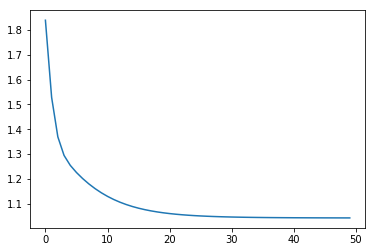

In [46]:
# 畫出 loss 的曲線
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history);

In [47]:
# 對答案
display((W @ X + b).argmax(axis=1).ravel())
display(y)

array([0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0])

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0])